# EDA

## IMPORT PACKAGES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#Automcomplete
%config IPCompleter.greedy=True

## IMPORT DATA

Project root

In [2]:
root = '/content/drive/MyDrive/02_RETAIL'

Replace the data_file_name.

In [3]:
name_cat = 'cat_result_quality.pickle'
name_num = 'num_result_quality.pickle'

Load data.

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
cat = pd.read_pickle(root + '/02_Data/03_Work/' + name_cat)
num = pd.read_pickle(root + '/02_Data/03_Work/' + name_num)

## EDA CATEGORICAL

### Statistics

We don't inlclude 'd'

In [7]:
cat.columns.to_list()

['store_id',
 'item_id',
 'd',
 'year',
 'month',
 'wday',
 'weekday',
 'event_name_1',
 'event_type_1']

In [8]:
include = cat.columns.to_list()
del include[2]

In [9]:
def cat_frequency(df_cat):
    result = df_cat.apply(lambda x: x.value_counts(normalize = True)).T.stack()\
                .to_frame().reset_index()\
                .rename(columns={'level_0':'Variable','level_1':'Value',0: "Frequency"})\
                .sort_values(by = ['Variable','Frequency'])
    return(result)

In [10]:
pd.set_option('display.max_rows', None)

cat_frequency(cat[include])

,Variable,Value,Frequency
41,event_name_1,Chanukah End,0.001880
42,event_name_1,Christmas,0.001880
43,event_name_1,Cinco De Mayo,0.001880
48,event_name_1,Father's day,0.001880
61,event_name_1,OrthodoxEaster,0.001880
44,event_name_1,ColumbusDay,0.002820
45,event_name_1,Easter,0.002820
46,event_name_1,Eid al-Fitr,0.002820
47,event_name_1,EidAlAdha,0.002820
49,event_name_1,Halloween,0.002820


In [11]:
pd.set_option('display.max_rows', 6)

### Graphical Analysis

In [12]:
def categorical_eda_plots(cat):

    #Calculate the number of rows we need
    from math import ceil
    rows = ceil(cat.shape[1] / 2)

    #Outline the plot
    f, ax = plt.subplots(nrows = rows, ncols = 2, figsize = (16, rows * 6))

    #We flatten to iterate through the graph as if it were 1 dimension instead of 2
    ax = ax.flat

    #Create the for loop that adds the plots
    for each, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[each])
        ax[each].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[each].tick_params(labelsize = 12)

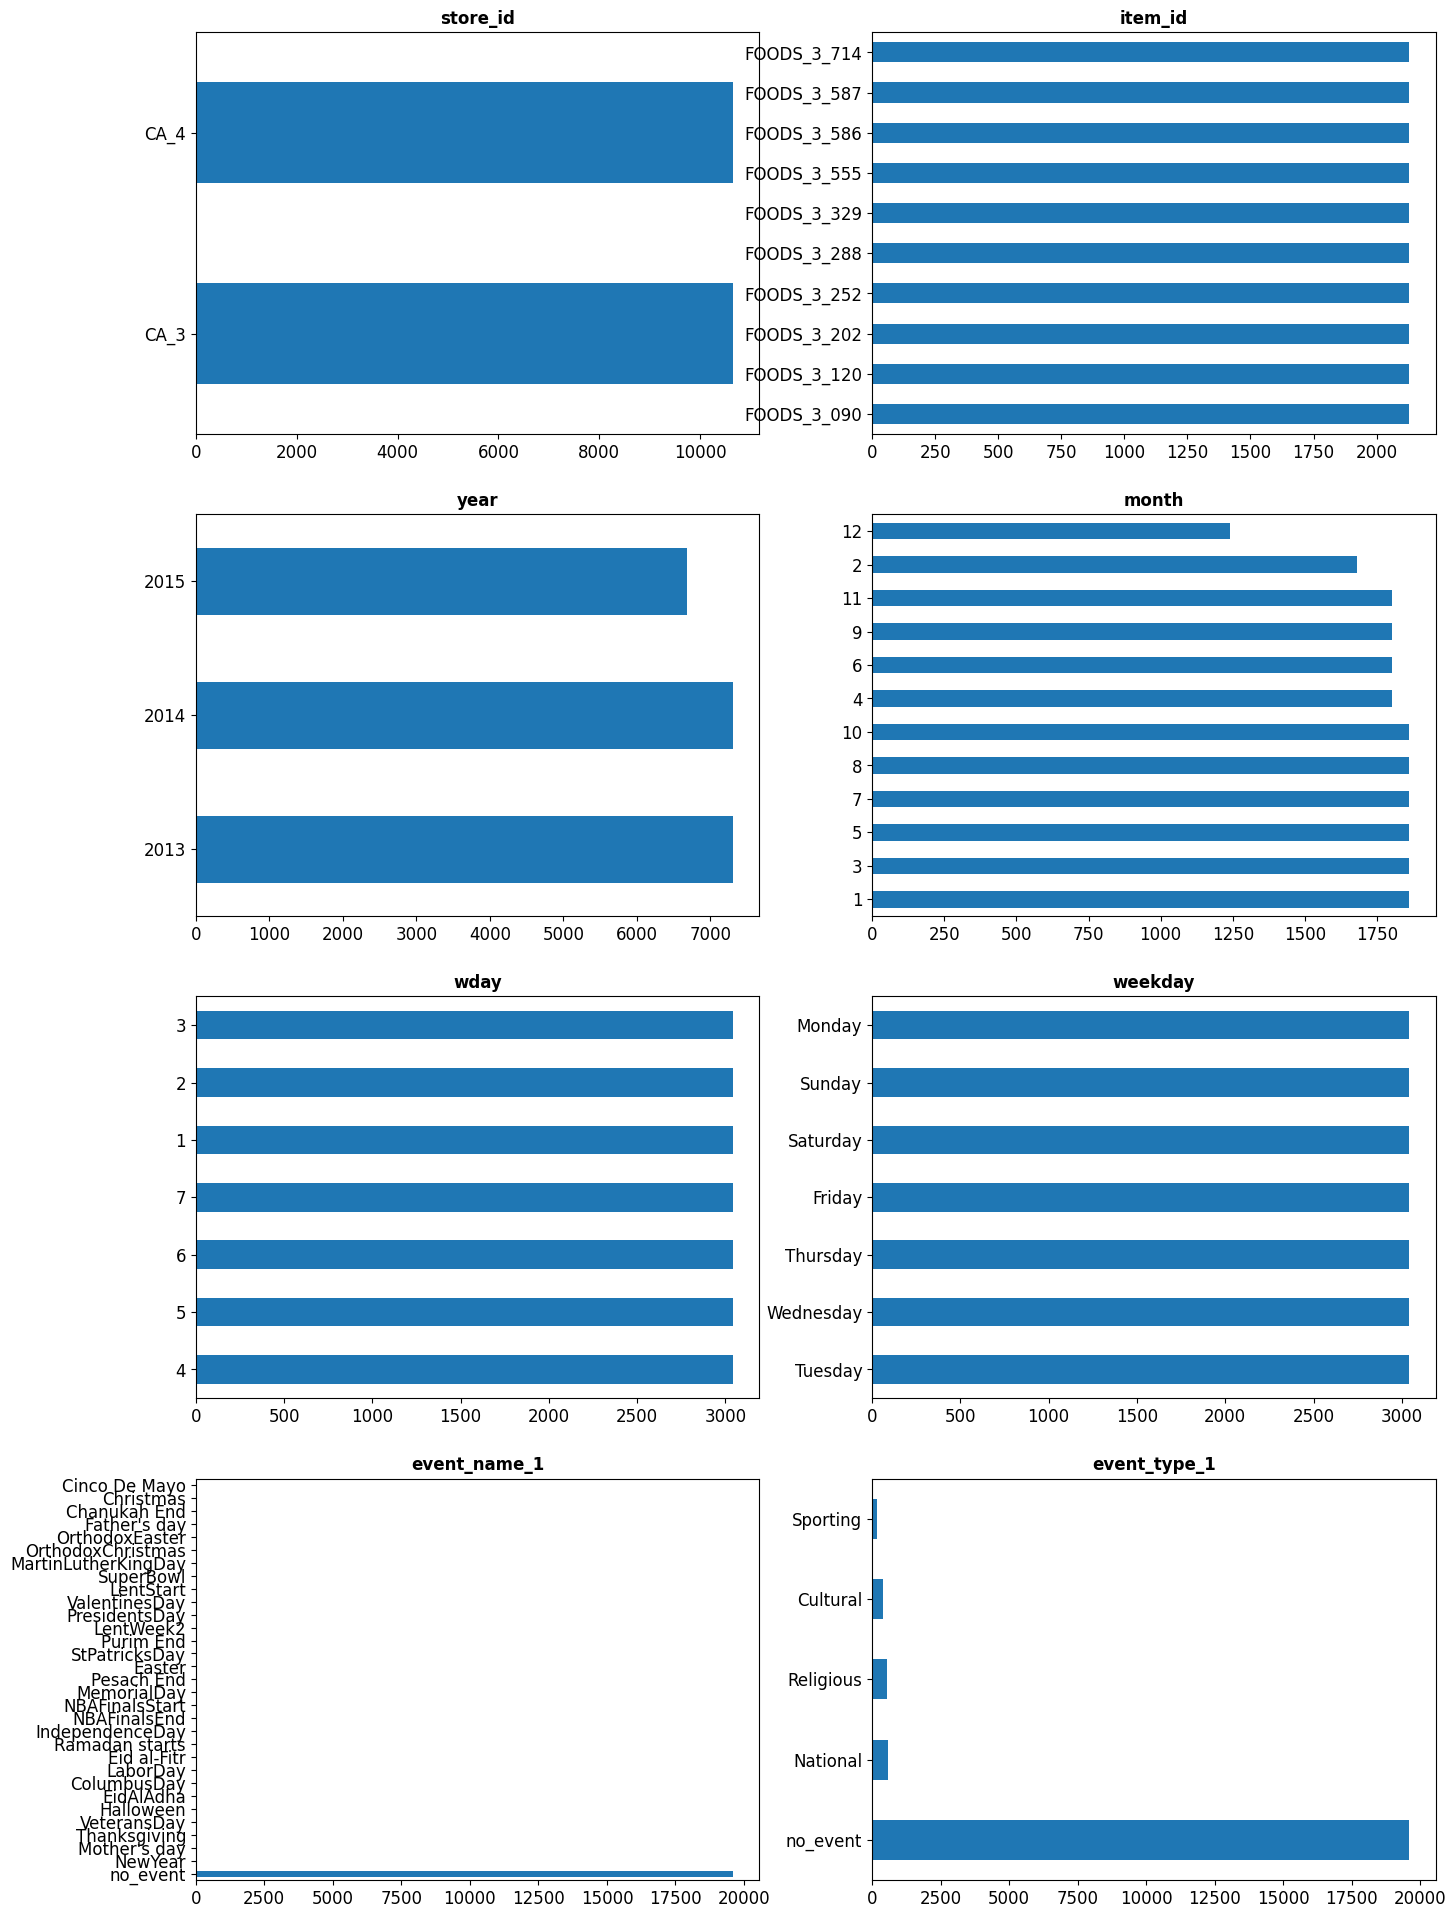

In [13]:
categorical_eda_plots(cat[include])

### EDA NUMERICAL

###  Statistic analysis

In [14]:
def statistics_cont(num):
    #Calculate describe
    statistics = num.describe().T
    #Add the median
    statistics['median'] = num.median()
    #We rearrange so that the median is next to the mean
    statistics = statistics.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #We return it
    return(statistics)

In [15]:
statistics_cont(num)

,count,mean,median,std,min,25%,50%,75%,max
wm_yr_wk,21280.0,11415.022556,11420.00,82.874752,11249.0,11335.0,11420.00,11506.00,11544.00
sales,21280.0,28.874577,18.00,38.988147,0.0,6.0,18.00,37.00,763.00
sell_price,21280.0,2.394261,1.58,1.236042,1.0,1.5,1.58,2.98,4.98


### Graph Analysis

In this case, the graphical analysis that makes the most sense is that of sales and prices by different dimensions.

So first we need to rejoin the two dataframes.

In [16]:
df = pd.concat([cat,num], axis=1)

df.head()

,store_id,item_id,d,year,month,wday,weekday,event_name_1,event_type_1,wm_yr_wk,sales,sell_price
date,,,,,,,,,,,,
2013-01-01,CA_3,FOODS_3_090,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,1.25
2013-01-01,CA_3,FOODS_3_120,d_704,2013,1,4,Tuesday,NewYear,National,11249,33,1.25
2013-01-01,CA_3,FOODS_3_202,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_252,d_704,2013,1,4,Tuesday,NewYear,National,11249,0,4.98
2013-01-01,CA_3,FOODS_3_288,d_704,2013,1,4,Tuesday,NewYear,National,11249,20,4.28


#### Globar store trend

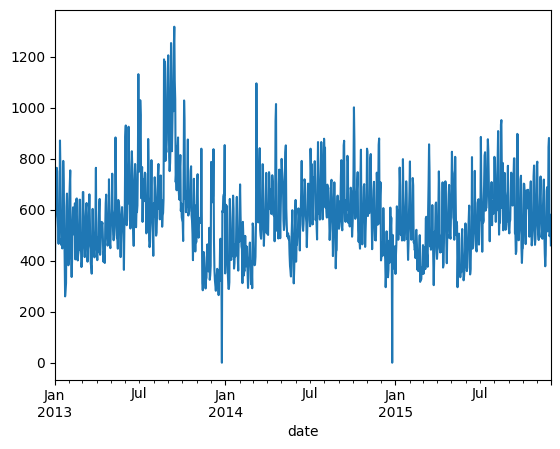

In [17]:
df.groupby('date').sales.sum().plot();

#### Trend per product sale

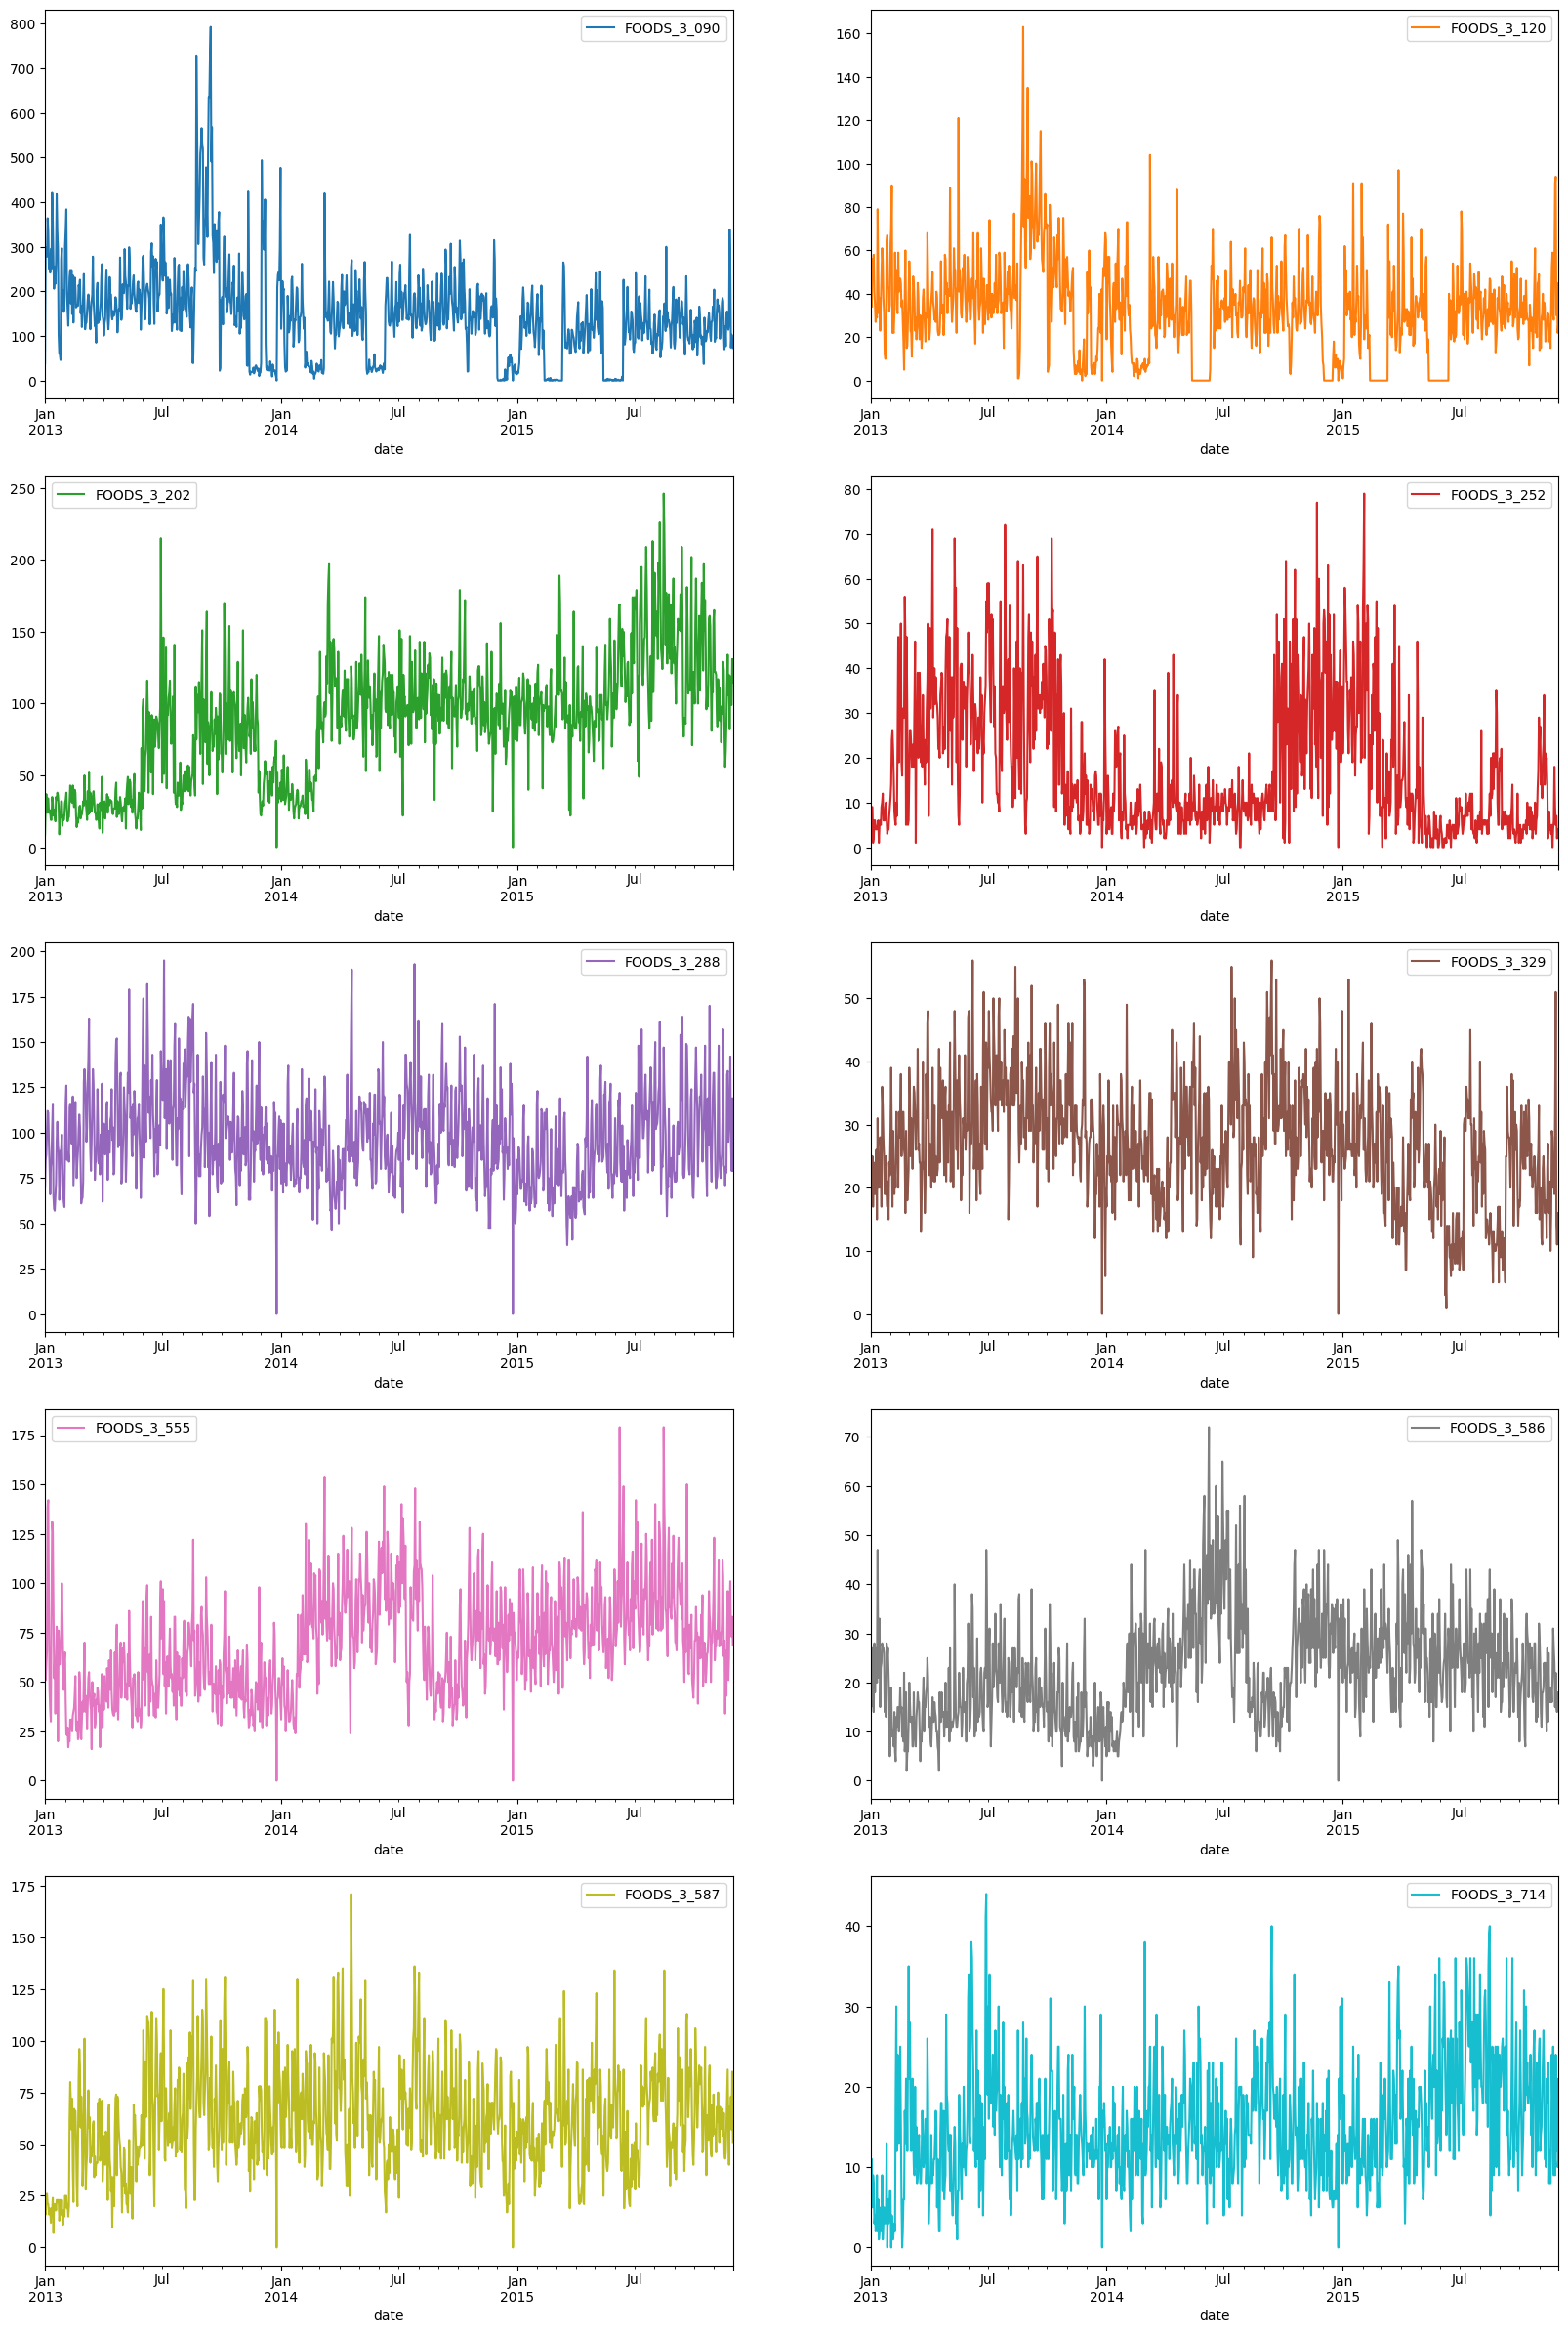

In [18]:
df.groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

#### Sales trend by store and product

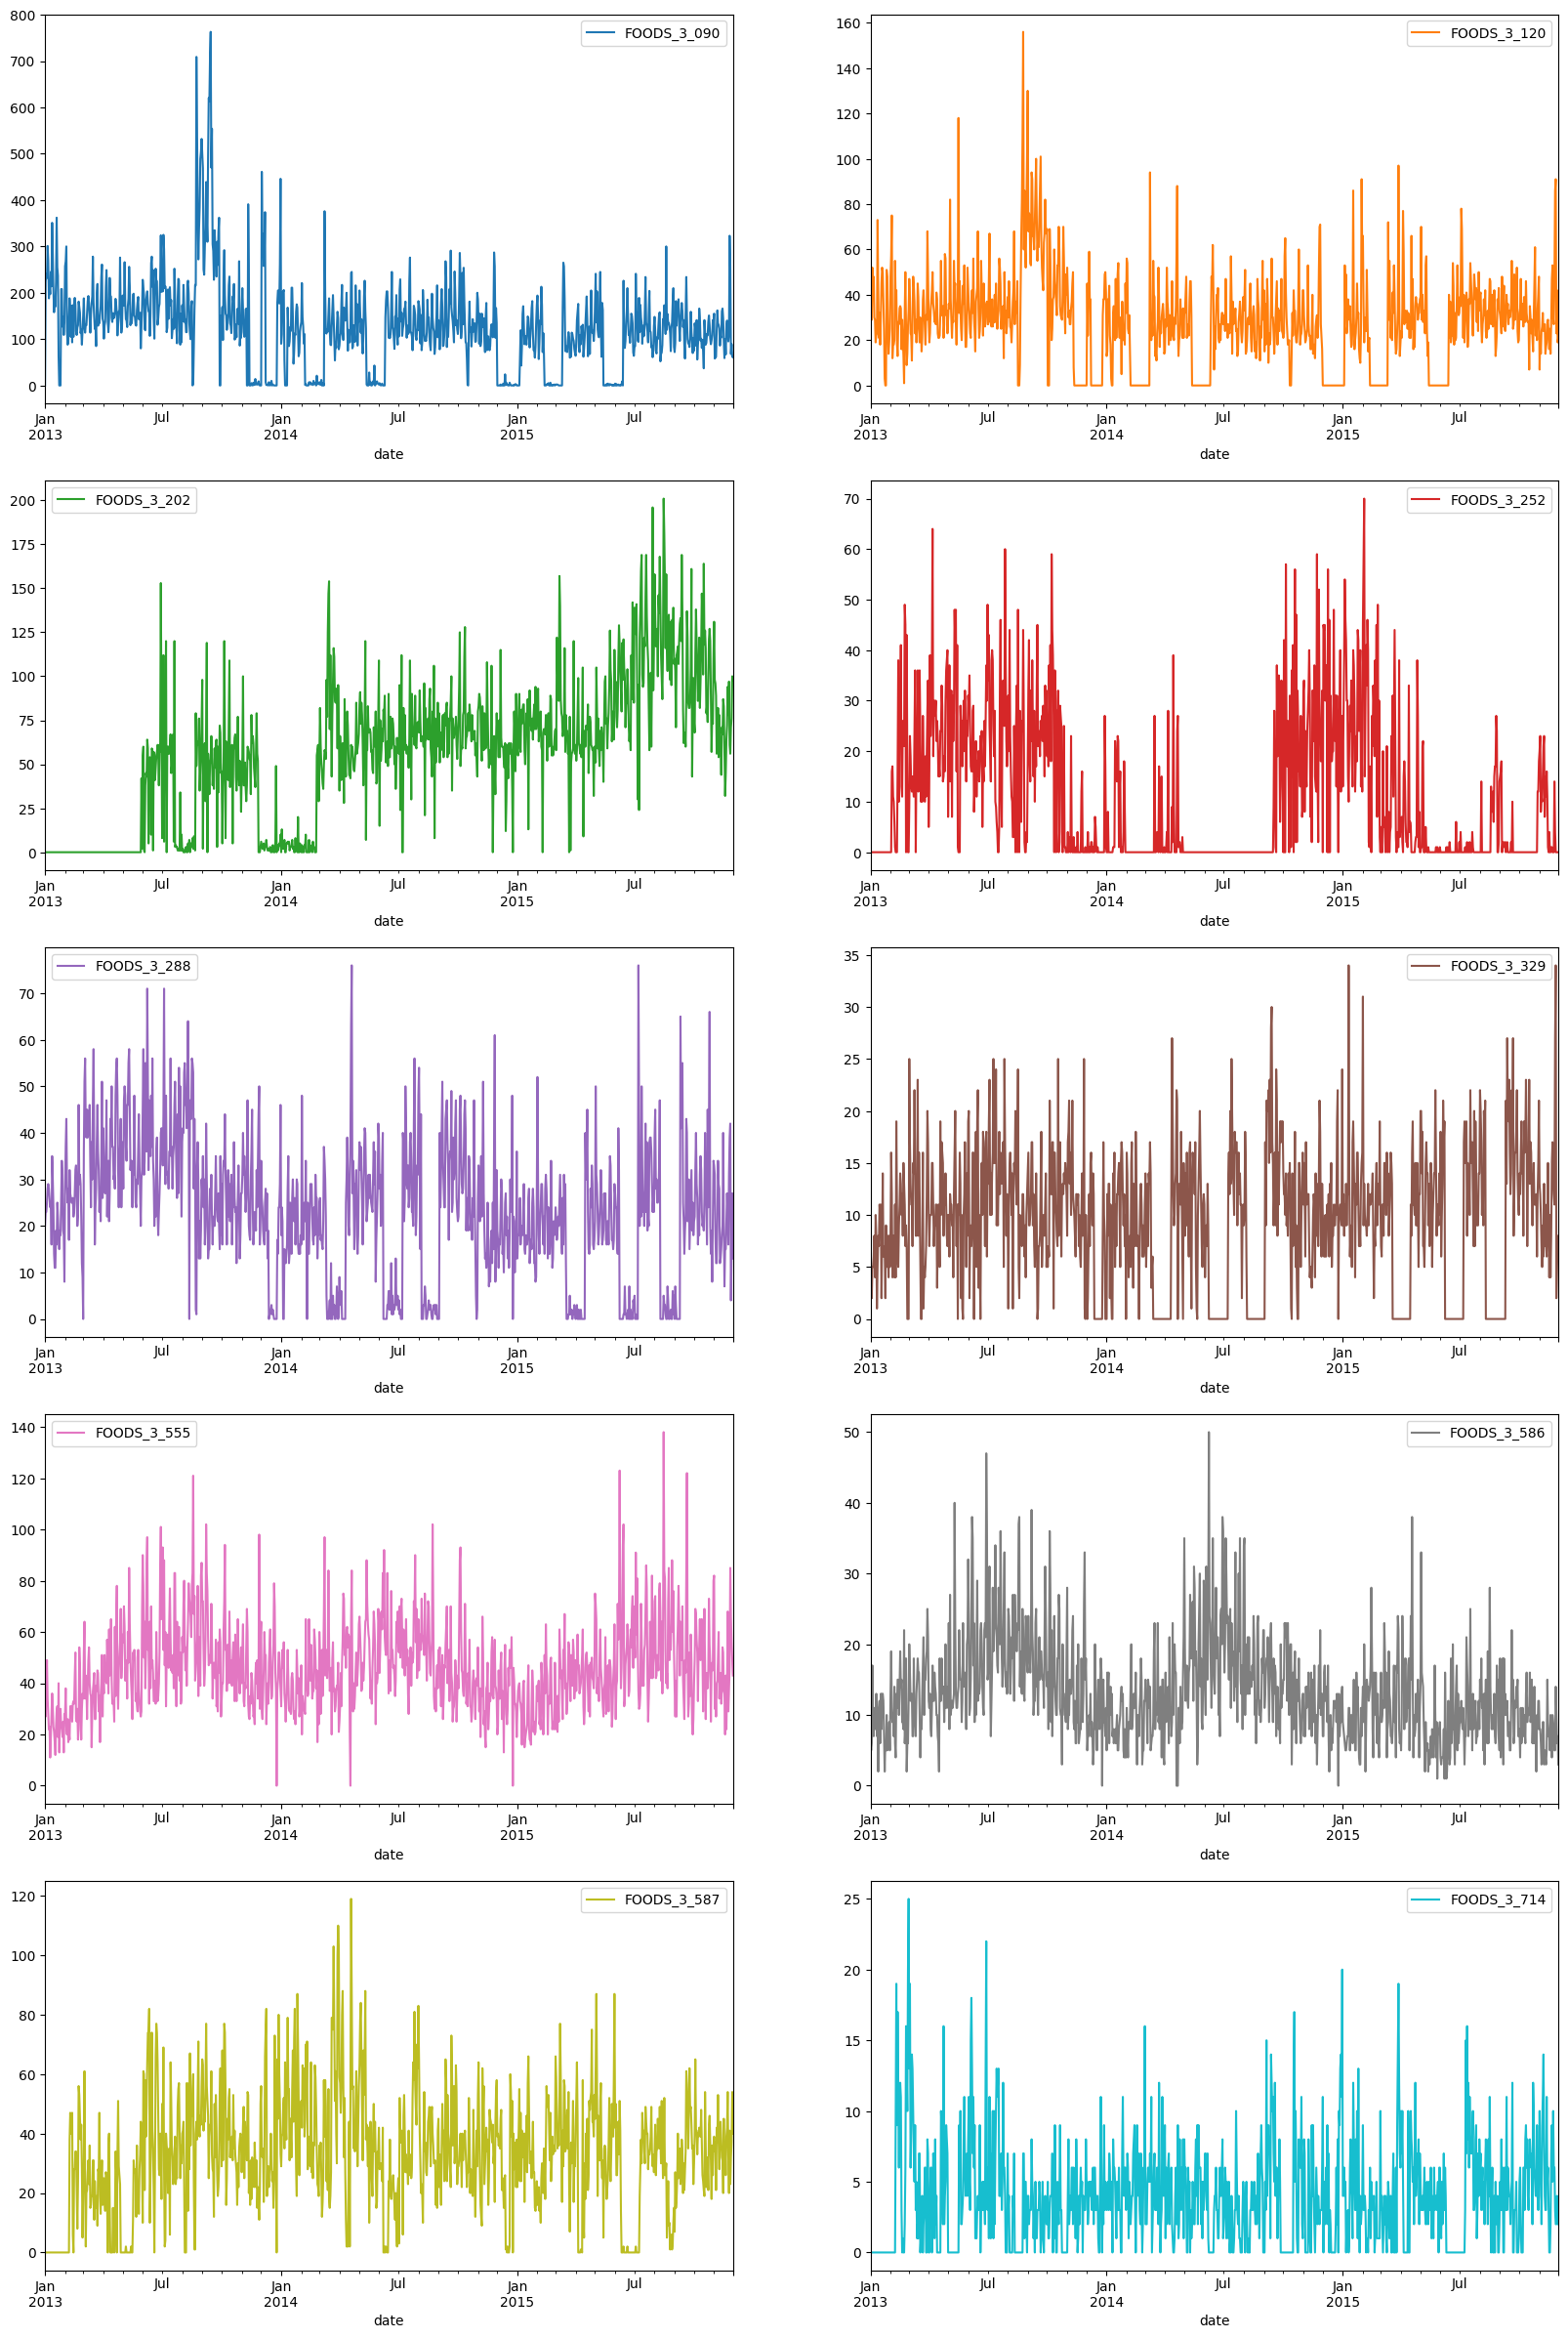

In [19]:
df.loc[df.store_id == 'CA_3'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

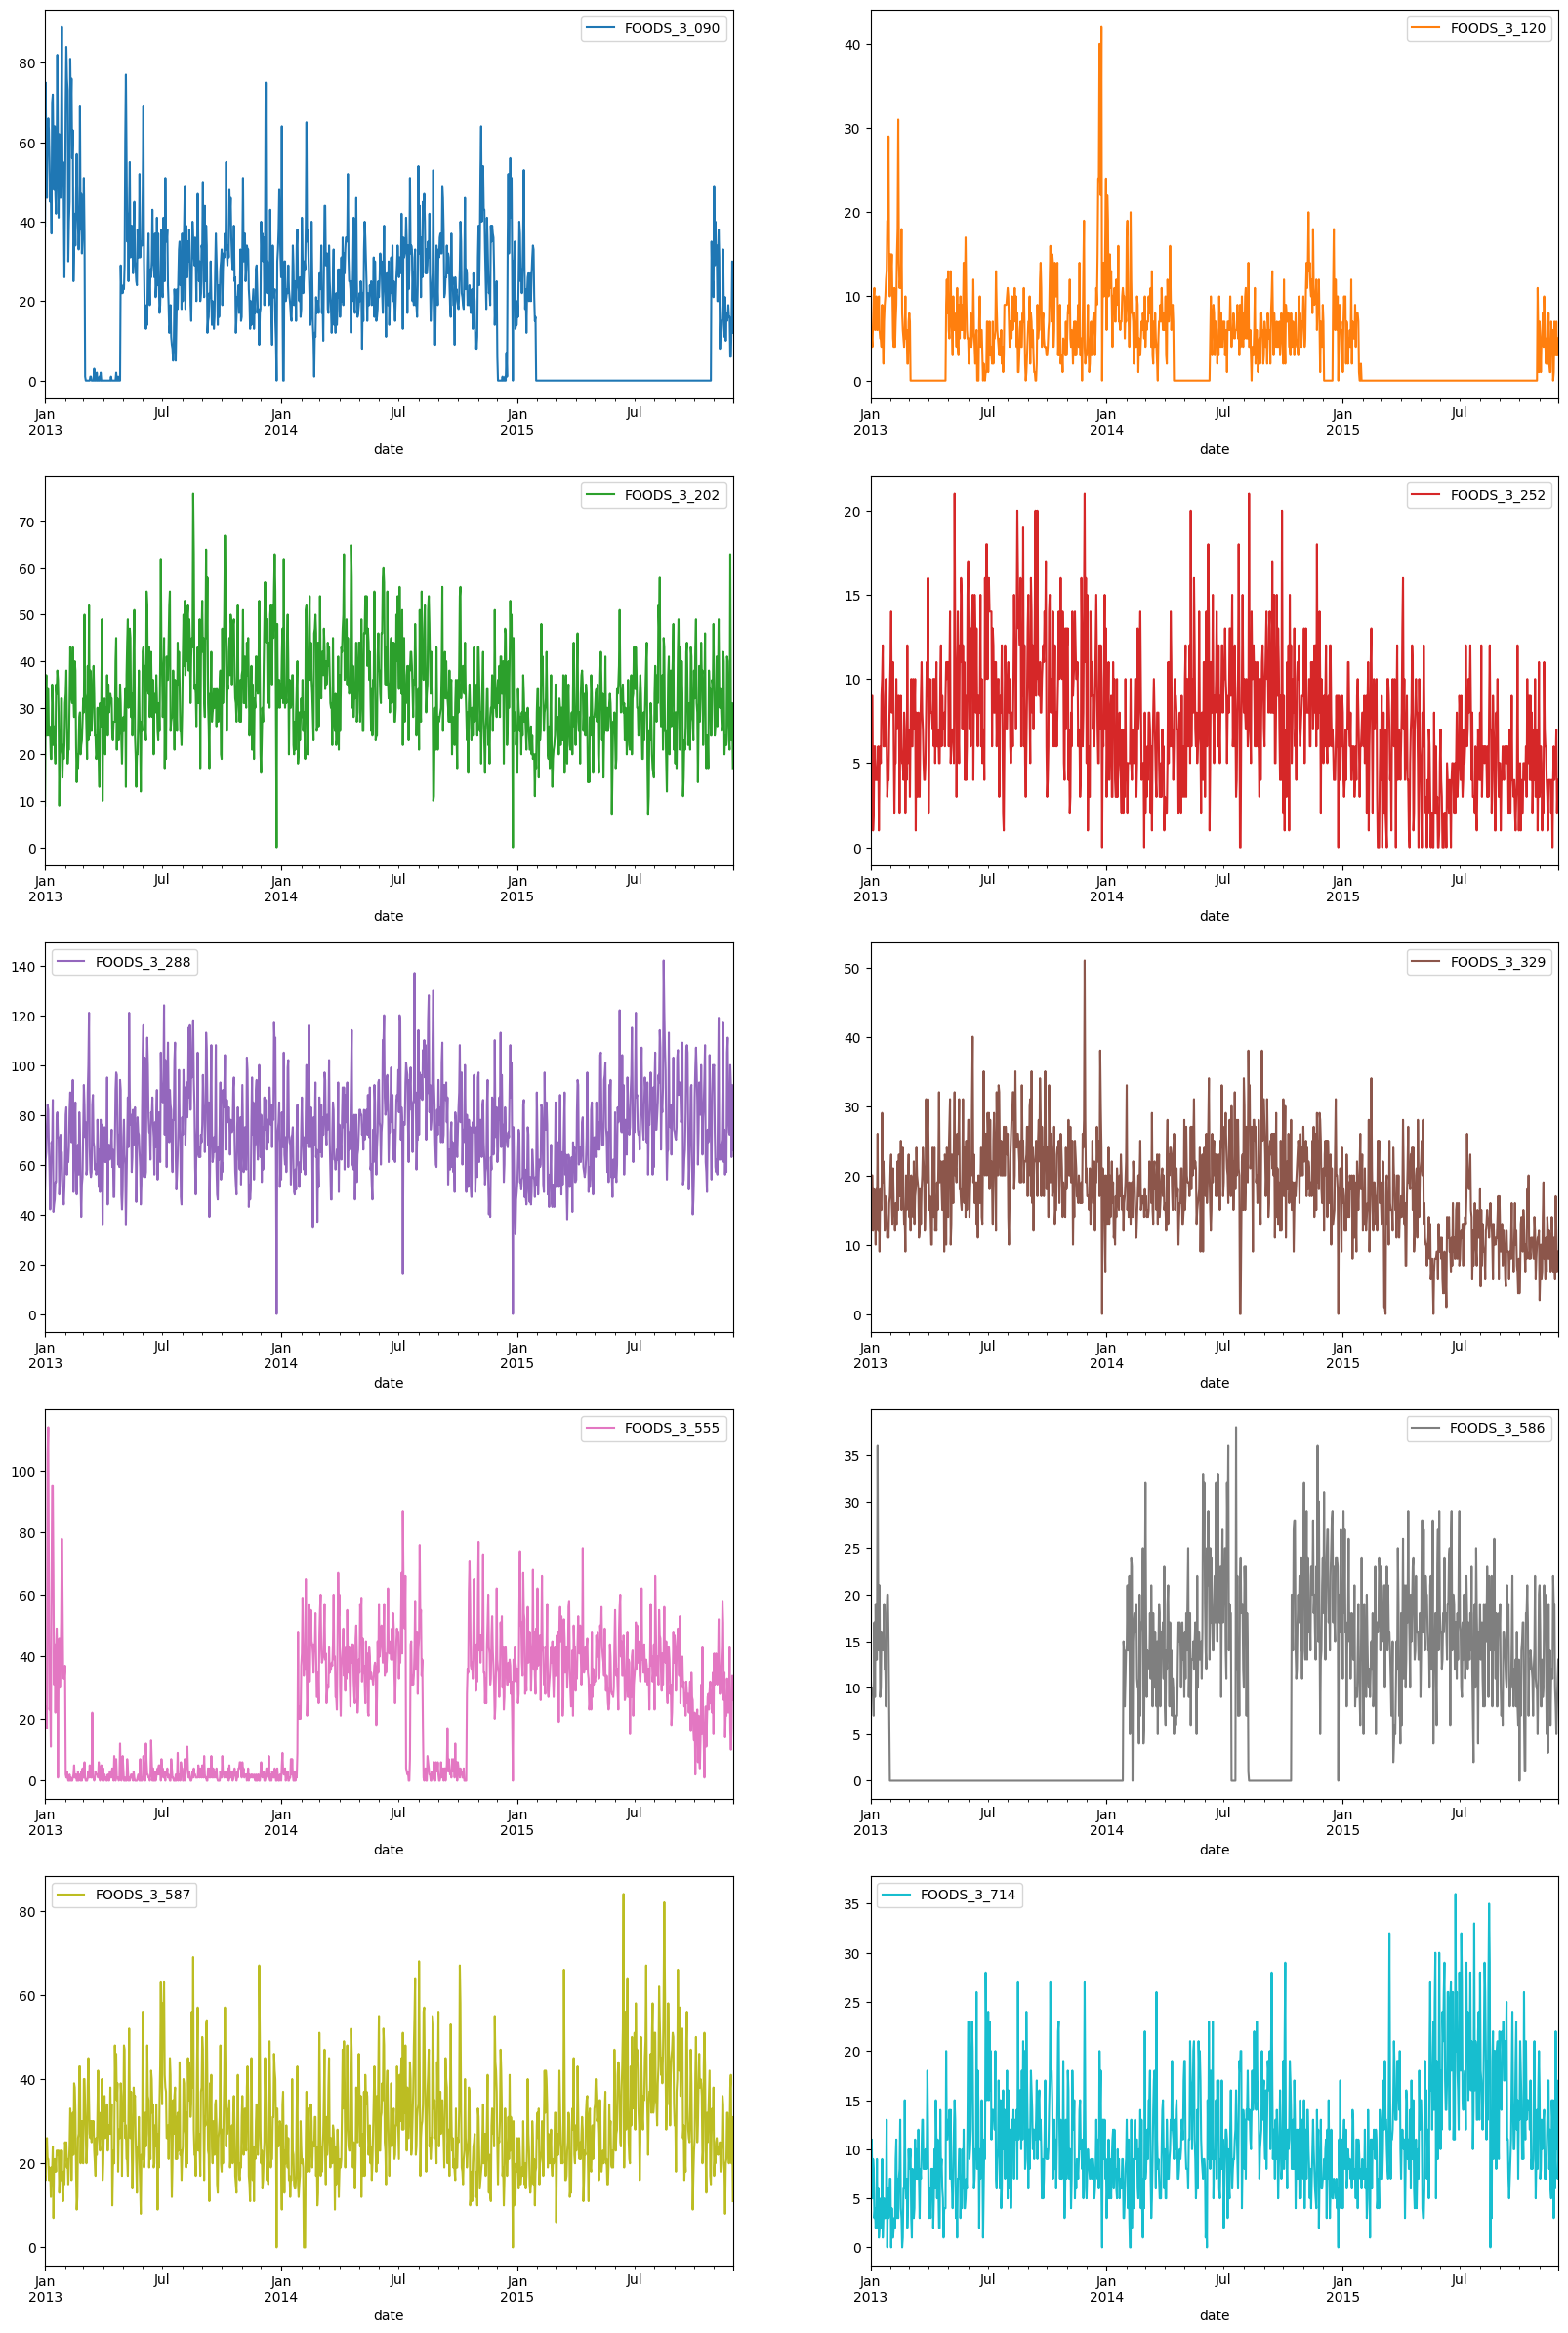

In [20]:
df.loc[df.store_id == 'CA_4'].groupby(['date','item_id']).sales.sum().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,30));

Conclusions:

* Hierarchical structure
* There are new products at the store level
* Although not at a general level, so we might think that they are not really new products if there is not intermittent demand
* There is intermittent demand
     * We do not know the cause: lack of demand, withdrawal from the market or out of stock

Actions:

* Model at product store level
* Create a variable that captures the effect of intermittent demand
* Use fast, tree-based algorithms: XGBoost or lightGBM

#### Price trend by product

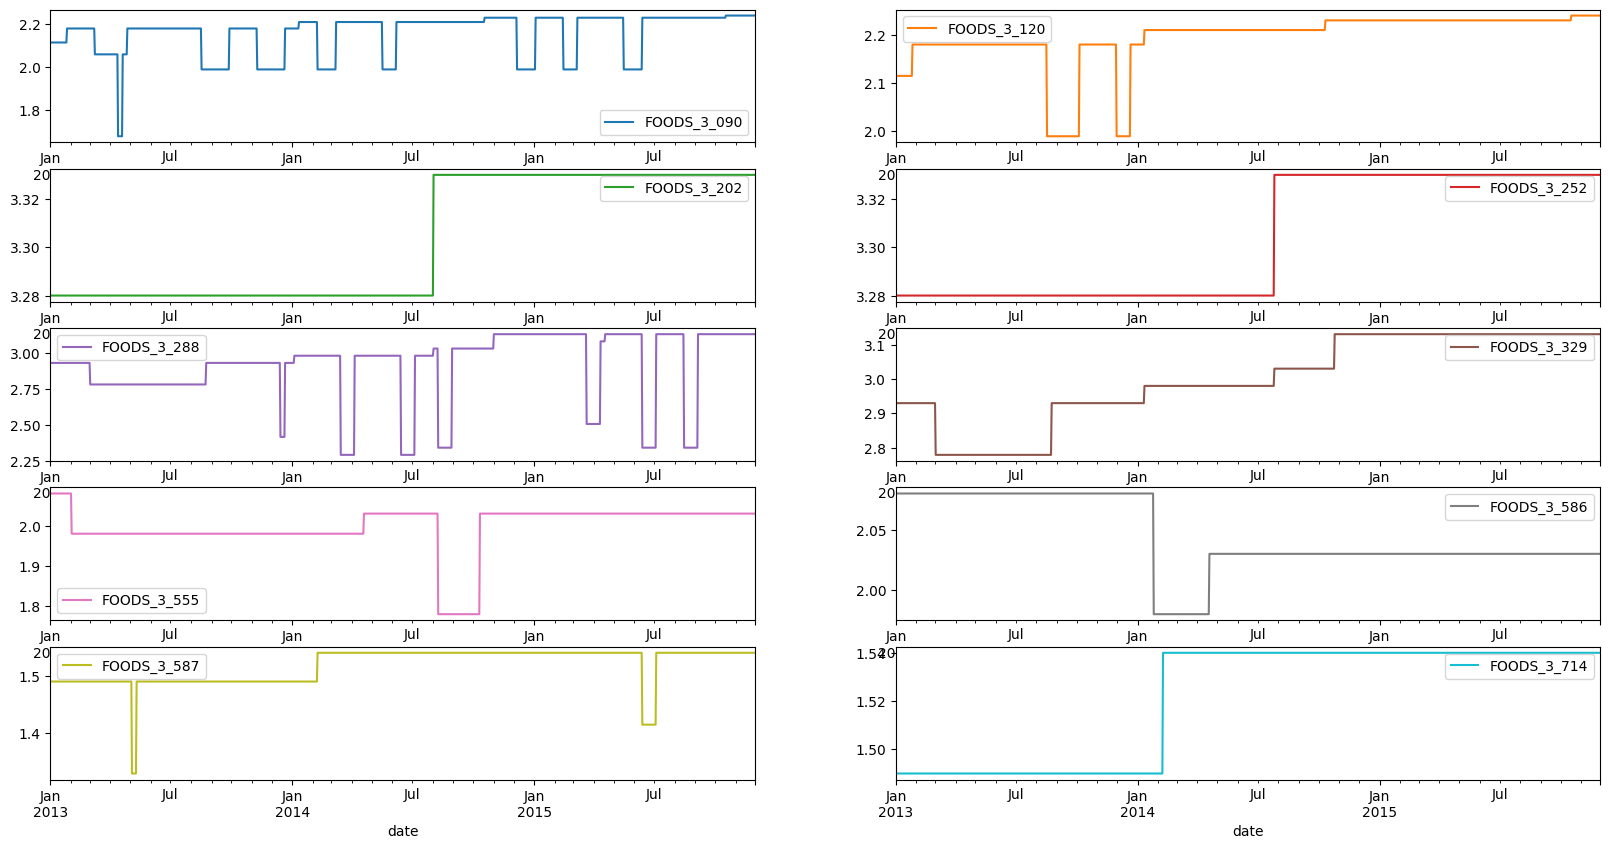

In [21]:
df.groupby(['date','item_id']).sell_price.mean().unstack().plot(subplots = True,  layout = (5,2), sharex=False, figsize=(20,10));

Cconclusions:

* Pricing policies vary greatly by product
* Seems like promotions are frequent
* It would be very useful to have a promotions calendar

#### Seasonality by product

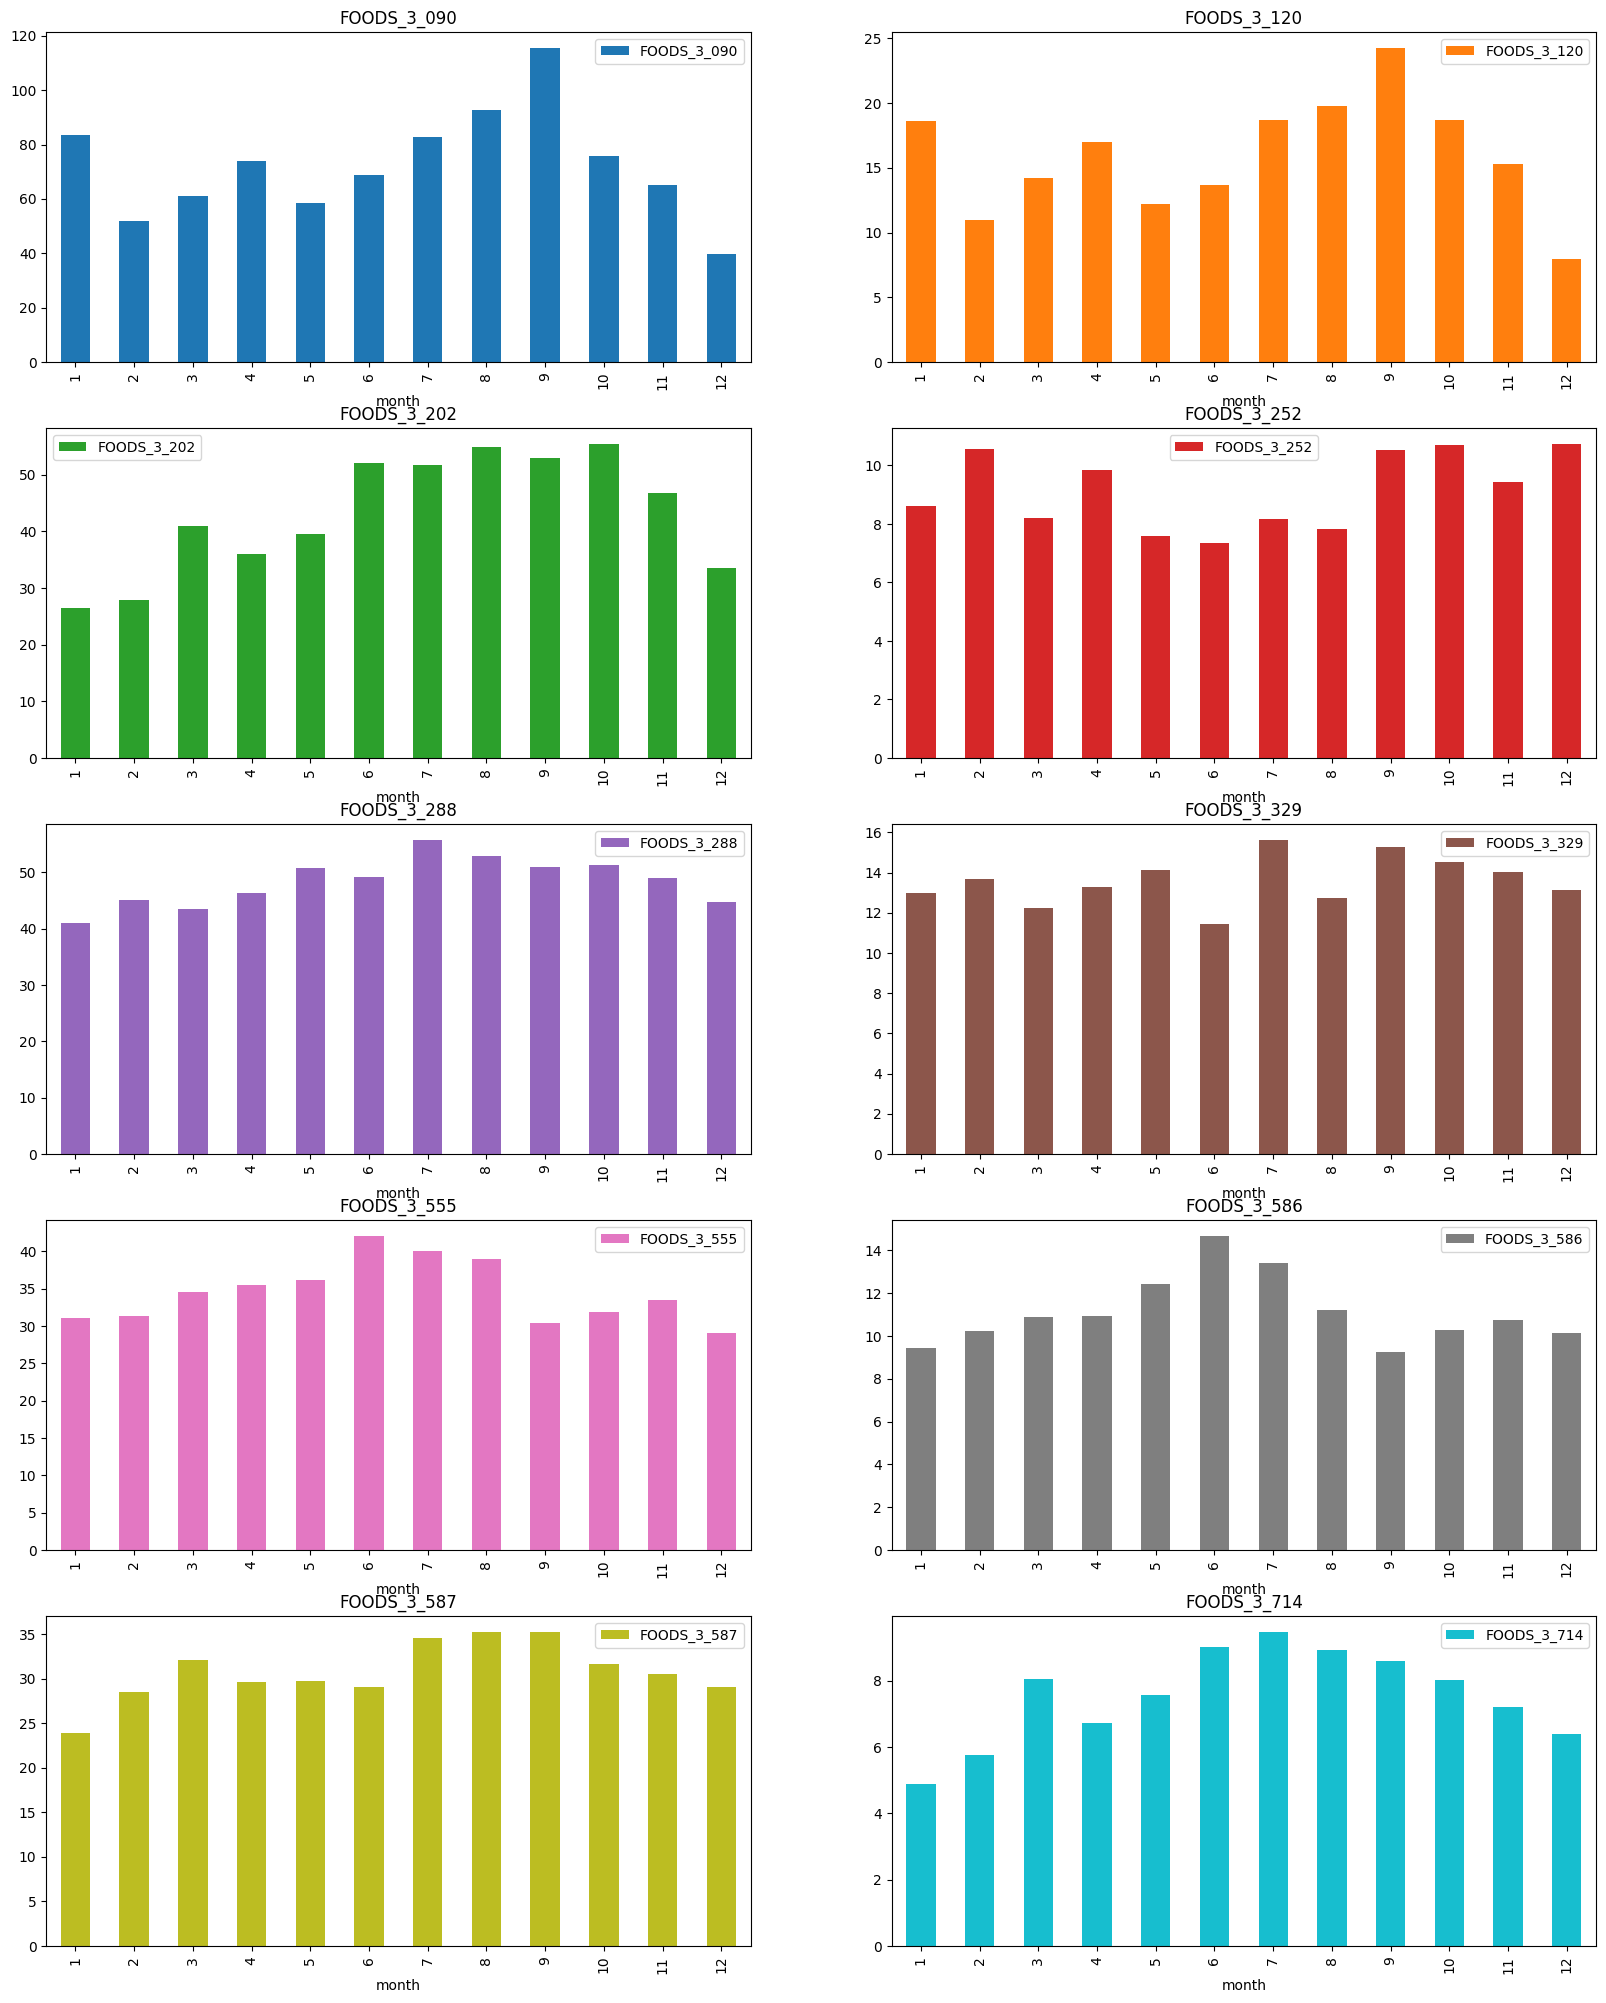

In [22]:
df.groupby(['month','item_id']).sales.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

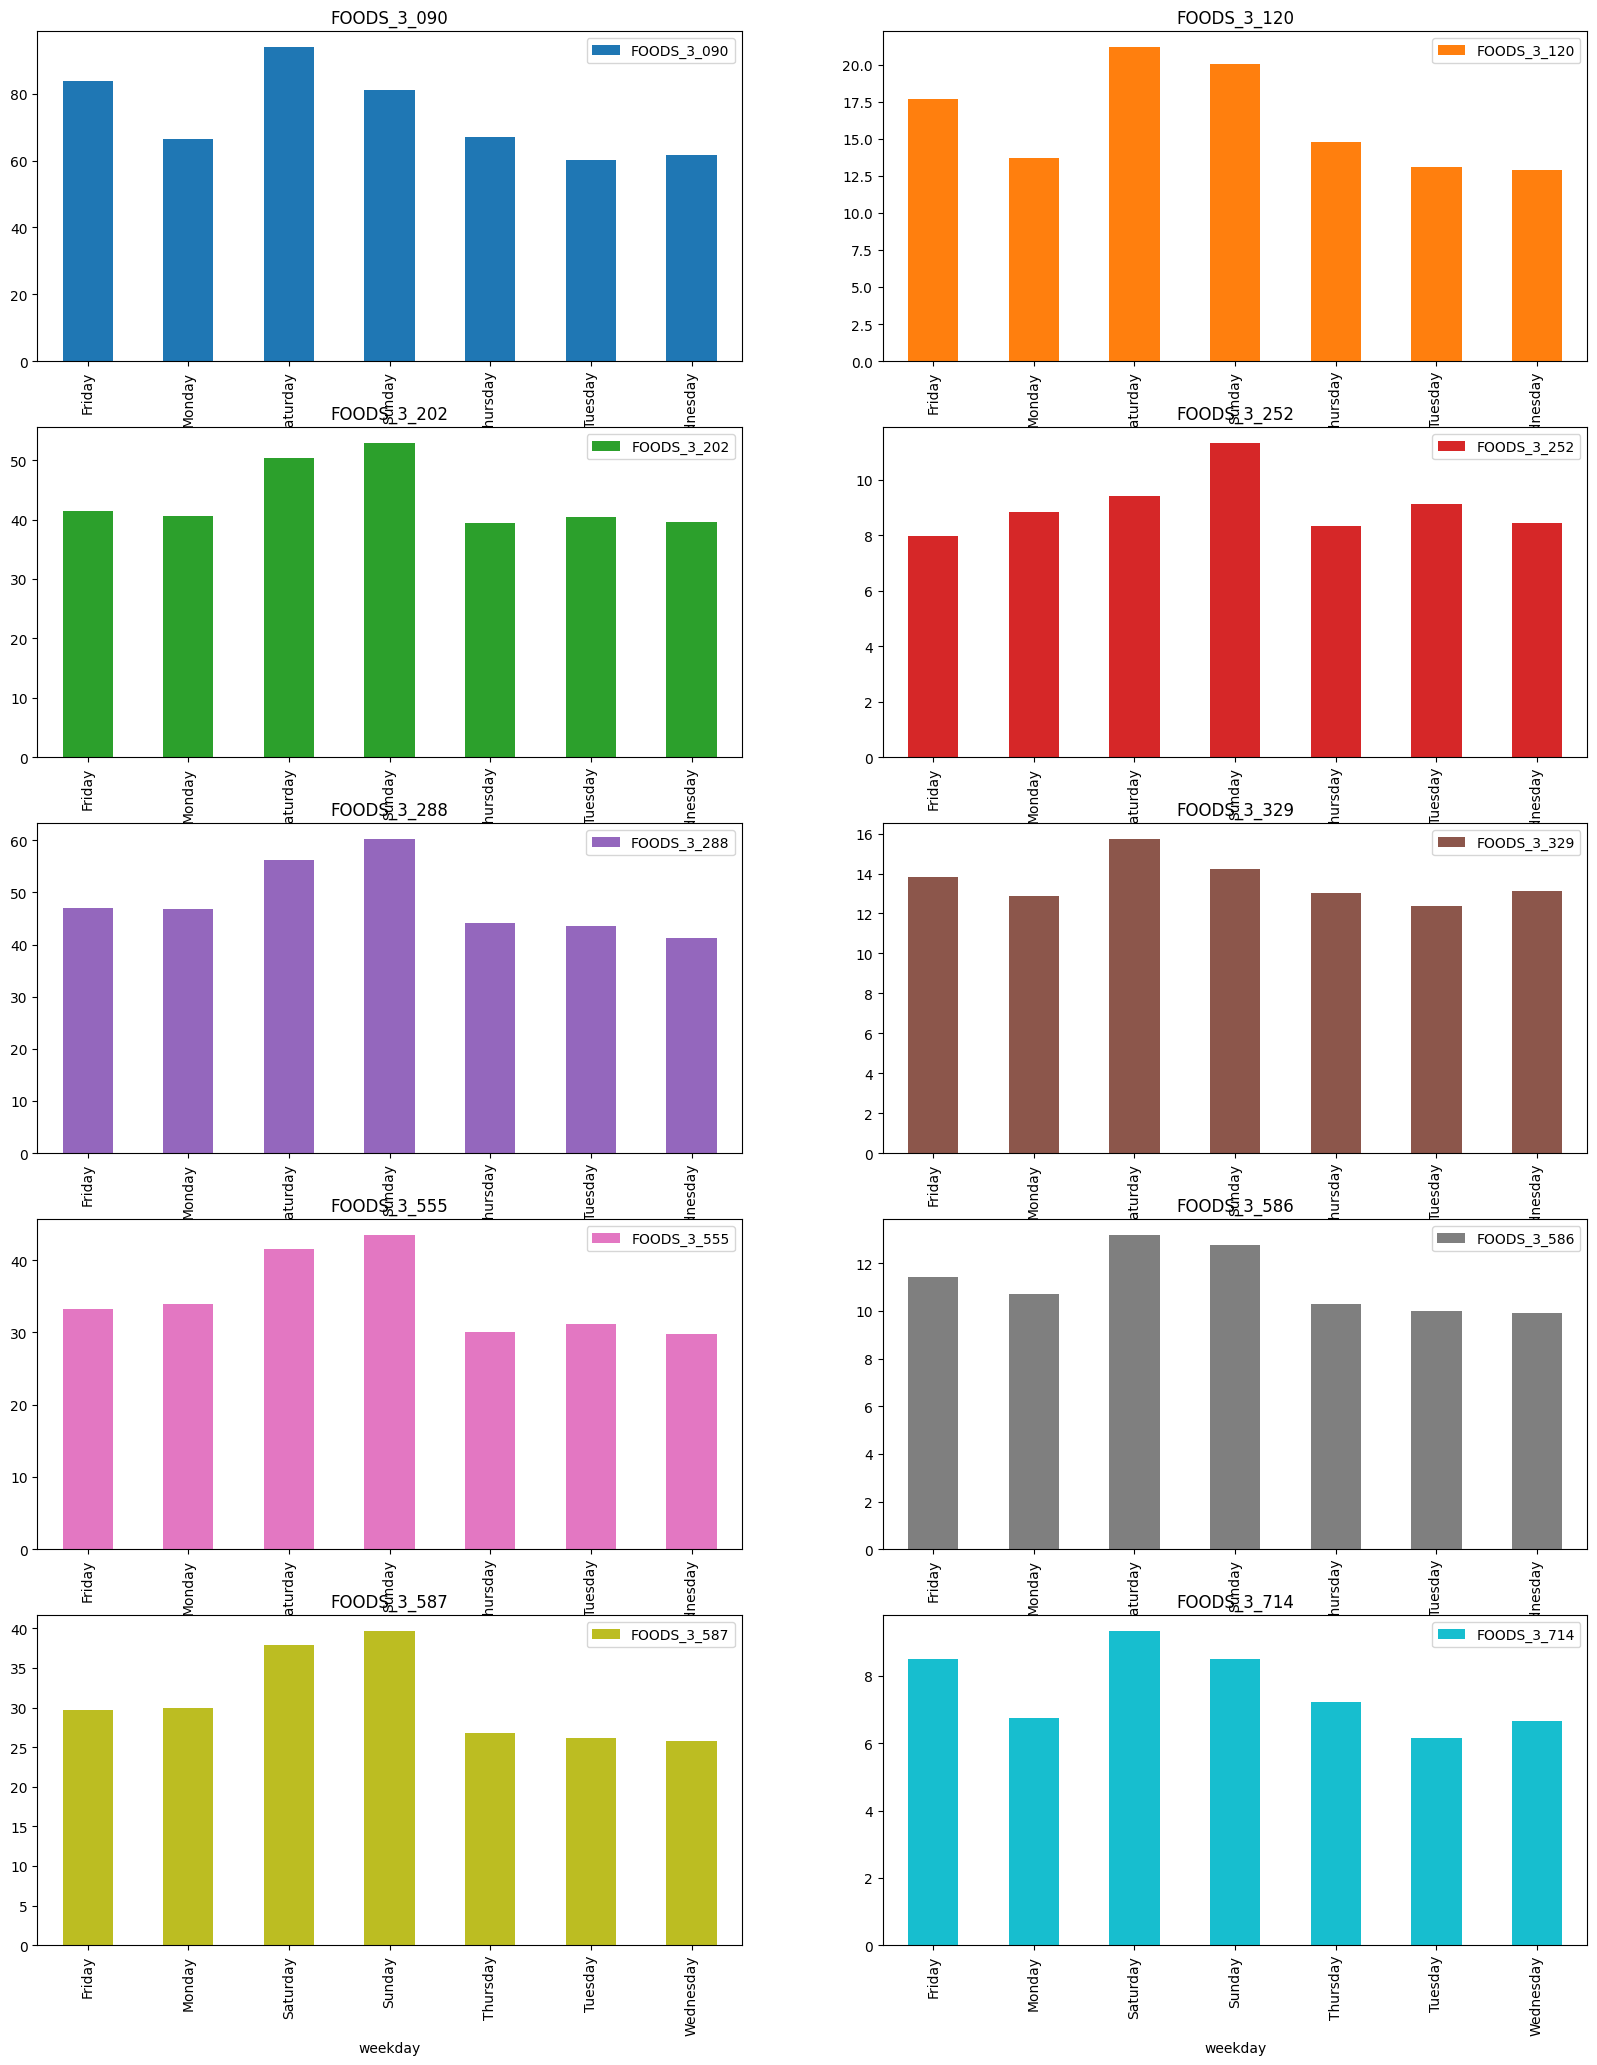

In [24]:
df.groupby(['weekday','item_id']).sales.mean().unstack().plot.bar(subplots = True,  layout = (6,2), sharex=False, figsize=(20,30));

#### Seasonality by specific event date

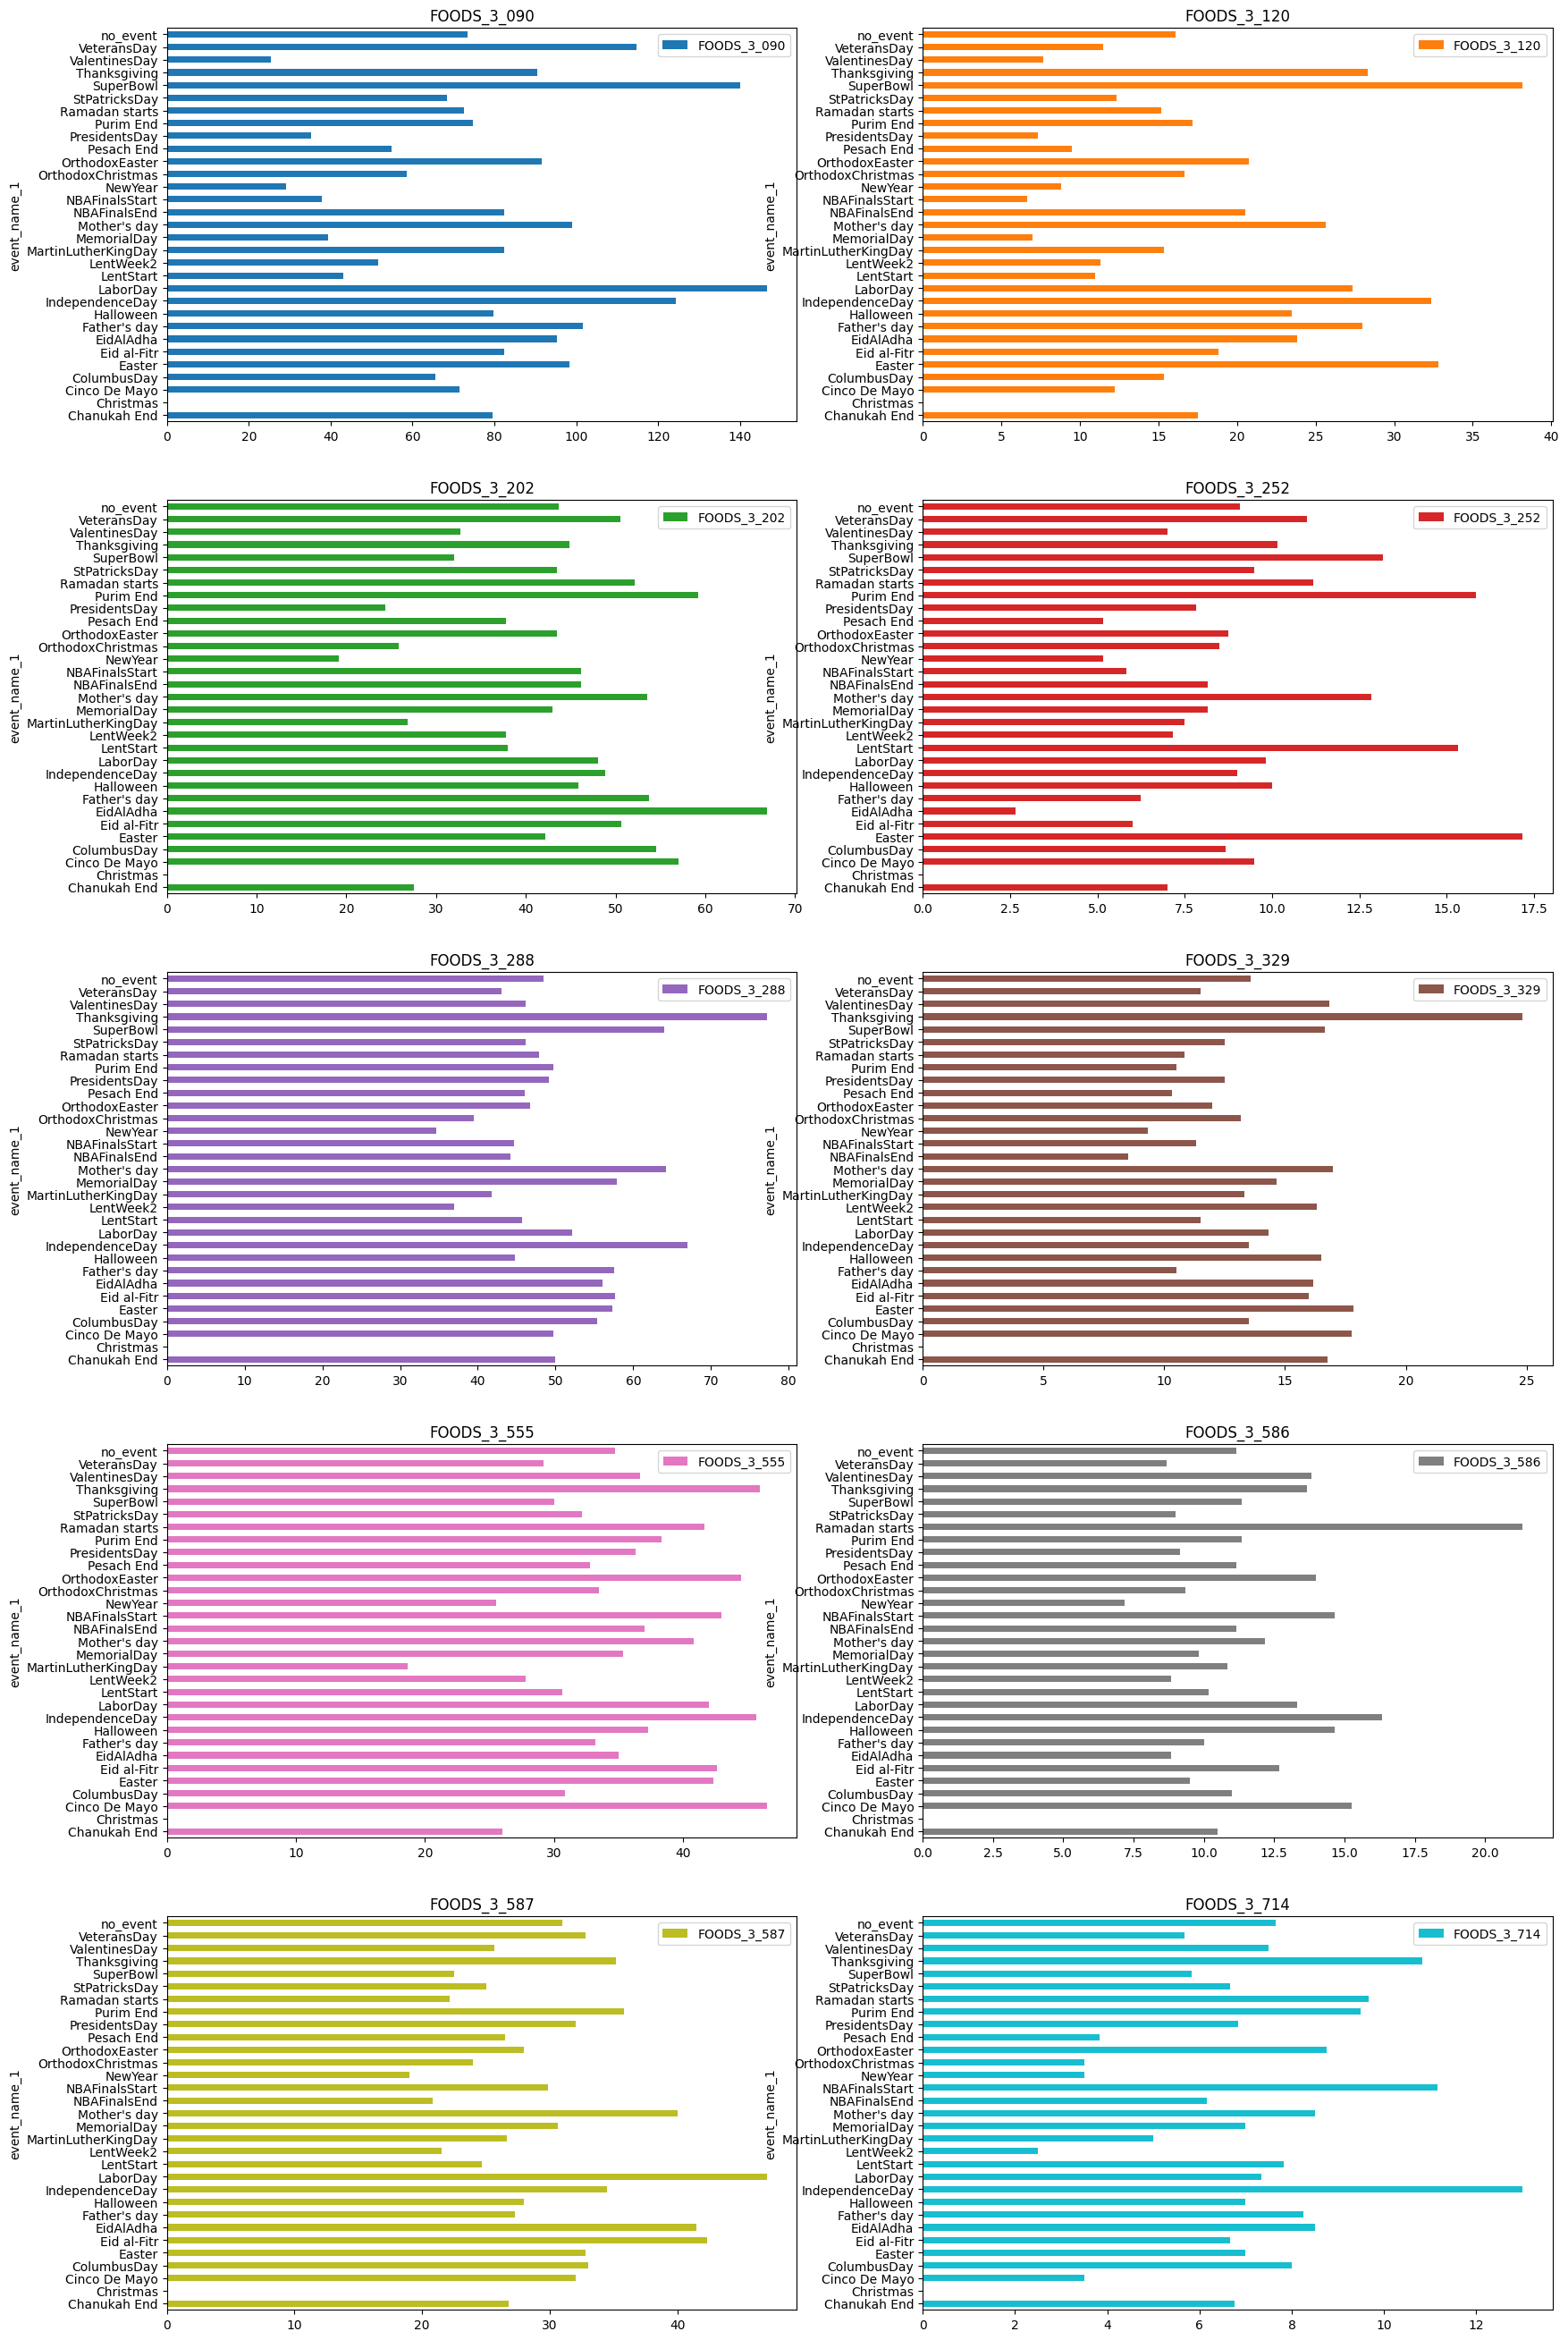

In [25]:
df.groupby(['event_name_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

#### Seasonality by event

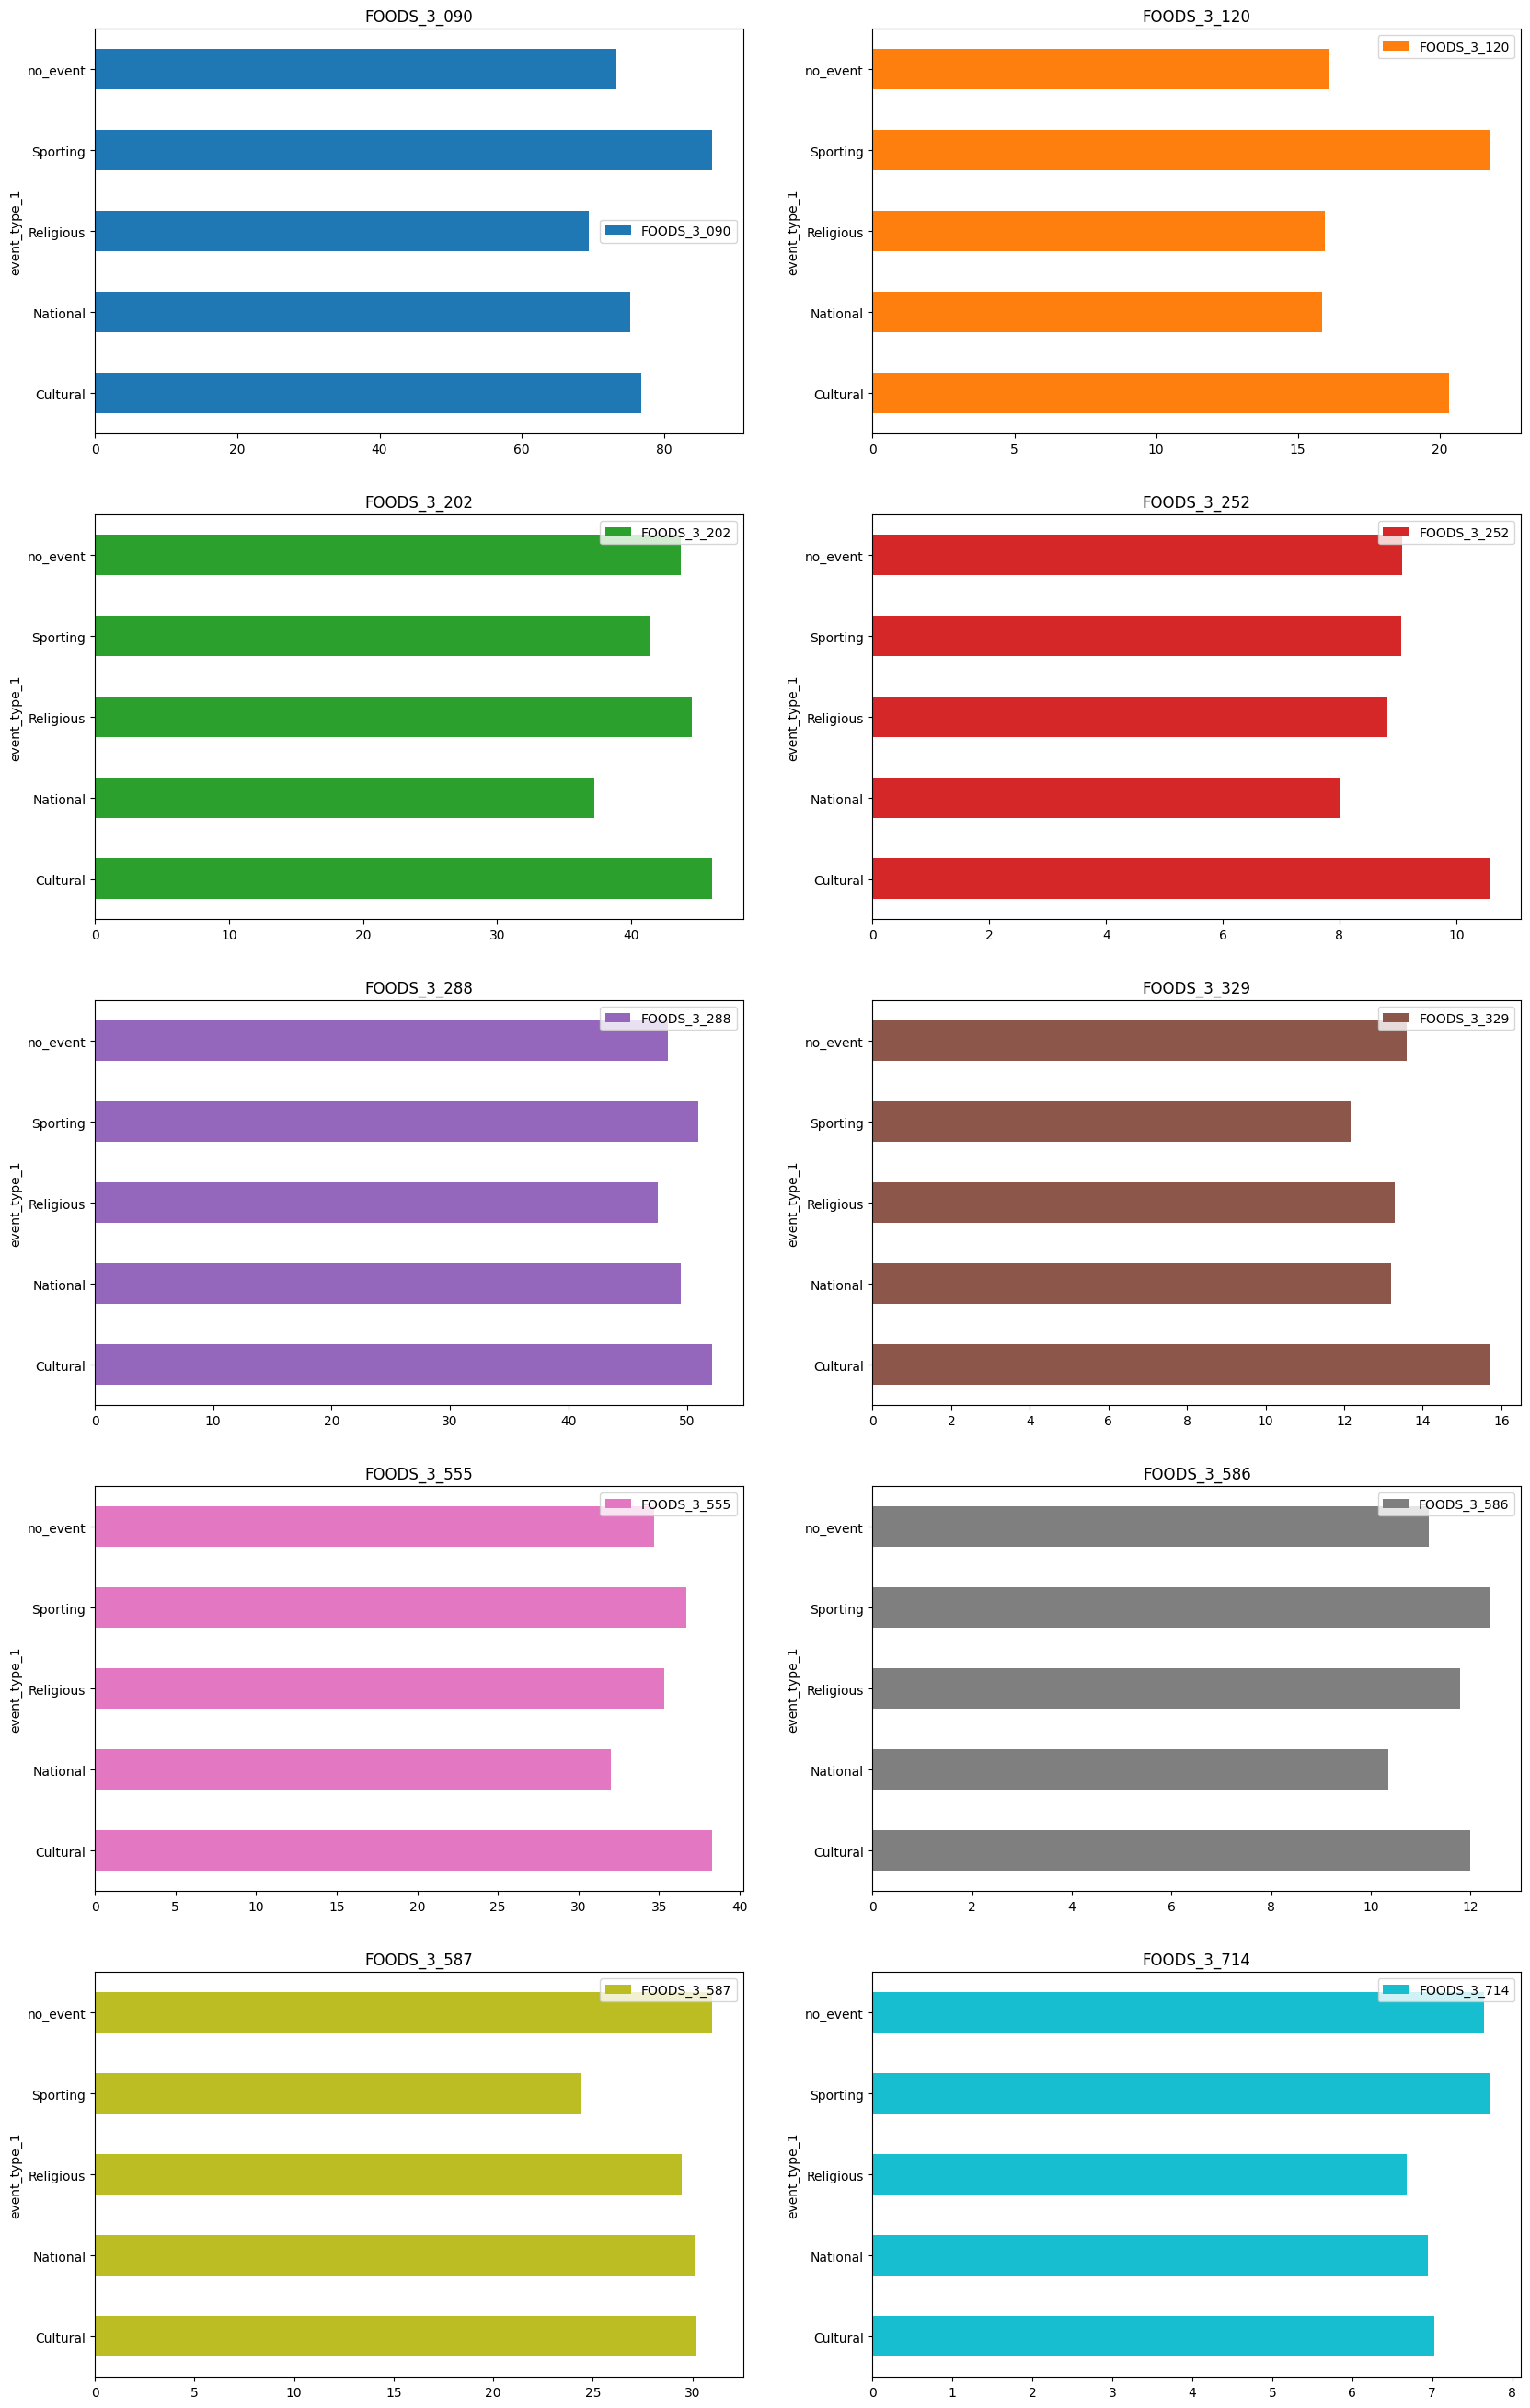

In [26]:
df.groupby(['event_type_1','item_id']).sales.mean().unstack().plot.barh(subplots = True,  layout = (6,2), sharex=False, figsize=(20,40));

Conclusions:

* All these variables do seem to affect which is good news

## SAVE DATASETS AFTER EDA

In [27]:
#Define the file names
root_cat = root + '/02_Data/03_Work/' + 'cat_result_eda.pickle'
root_num = root + '/02_Data/03_Work/' + 'num_result_eda.pickle'

In [28]:
#Save files
cat.to_pickle(root_cat)
num.to_pickle(root_num)